In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('cleaned_train.csv')
second_df = pd.read_csv('cleaned_test.csv')

In [5]:
# Reading our two datasets
df['Type'] = 'Train'
second_df['Type'] = 'Test'
second_df['Target'] = 0

In [6]:
full_data = pd.concat([df, second_df], axis=0, sort=True) # Concatenating the two datasets

In [7]:
full_data.head()

,ApplicantIncome,CoapplicantIncome,Credit_History,Dependents,Gender_Male,Graduate,LoanAmount,Loan_Amount_Term,Loan_ID,Loan_Status_Approved,Married,Property_Area,Self_Employed,Target,Type
0,5849,0.0,1.0,0,1,1,146.0,360.0,LP001002,1.0,0,1,0,NaN,Train
1,4583,1508.0,1.0,1,1,1,128.0,360.0,LP001003,0.0,1,2,0,NaN,Train
2,3000,0.0,1.0,0,1,1,66.0,360.0,LP001005,1.0,1,1,1,NaN,Train
3,2583,2358.0,1.0,0,1,0,120.0,360.0,LP001006,1.0,1,1,0,NaN,Train
4,6000,0.0,1.0,0,1,1,141.0,360.0,LP001008,1.0,0,1,0,NaN,Train


In [8]:
len(full_data)

981

In [9]:
full_data.dtypes

ApplicantIncome           int64
CoapplicantIncome       float64
Credit_History          float64
Dependents                int64
Gender_Male               int64
Graduate                  int64
LoanAmount              float64
Loan_Amount_Term        float64
Loan_ID                  object
Loan_Status_Approved    float64
Married                   int64
Property_Area             int64
Self_Employed             int64
Target                  float64
Type                     object
dtype: object

In [10]:
# Not much correlation between numerical variables
full_data.corr() 

,ApplicantIncome,CoapplicantIncome,Credit_History,Dependents,Gender_Male,Graduate,LoanAmount,Loan_Amount_Term,Loan_Status_Approved,Married,Property_Area,Self_Employed,Target
ApplicantIncome,1.000000,-0.114247,0.020201,0.122136,0.060444,0.138909,0.547031,-0.023042,-0.004710,0.052126,-0.007810,0.113106,NaN
CoapplicantIncome,-0.114247,1.000000,-0.011531,0.003223,0.082428,0.060380,0.178231,-0.043716,-0.059187,0.061606,0.042943,-0.018861,NaN
Credit_History,0.020201,-0.011531,1.000000,-0.045335,0.018627,0.062416,-0.003606,-0.018341,0.540556,0.021738,-0.026231,0.034485,NaN
Dependents,0.122136,0.003223,-0.045335,1.000000,0.139248,-0.084894,0.149342,-0.082497,0.010118,0.344291,-0.006883,0.026241,NaN
Gender_Male,0.060444,0.082428,0.018627,0.139248,1.000000,-0.040649,0.096640,-0.069631,0.017987,0.327012,0.083492,0.024719,NaN
Graduate,0.138909,0.060380,0.062416,-0.084894,-0.040649,1.000000,0.161948,0.024029,0.085884,-0.026211,-0.033164,0.010848,NaN
LoanAmount,0.547031,0.178231,-0.003606,0.149342,0.096640,0.161948,1.000000,0.054496,-0.036345,0.156485,0.013681,0.107146,NaN
Loan_Amount_Term,-0.023042,-0.043716,-0.018341,-0.082497,-0.069631,0.024029,0.054496,1.000000,-0.020974,-0.048182,-0.007075,-0.031103,NaN
Loan_Status_Approved,-0.004710,-0.059187,0.540556,0.010118,0.017987,0.085884,-0.036345,-0.020974,1.000000,0.091478,-0.137545,-0.003700,NaN
Married,0.052126,0.061606,0.021738,0.344291,0.327012,-0.026211,0.156485,-0.048182,0.091478,1.000000,0.000844,0.013666,NaN


In [11]:
full_data.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,981.0,5179.795107,5695.104533,0.0,2875.0,3800.0,5516.0,81000.0
CoapplicantIncome,981.0,1601.916330,2718.772806,0.0,0.0,1110.0,2365.0,41667.0
Credit_History,981.0,0.849134,0.358101,0.0,1.0,1.0,1.0,1.0
Dependents,981.0,0.767584,1.030657,0.0,0.0,0.0,2.0,3.0
Gender_Male,981.0,0.814475,0.388921,0.0,1.0,1.0,1.0,1.0
Graduate,981.0,0.777778,0.415952,0.0,1.0,1.0,1.0,1.0
LoanAmount,981.0,142.556575,76.350963,9.0,101.0,128.0,160.0,700.0
Loan_Amount_Term,981.0,342.197757,64.432892,6.0,360.0,360.0,360.0,480.0
Loan_Status_Approved,614.0,0.687296,0.463973,0.0,0.0,1.0,1.0,1.0
Married,981.0,0.646279,0.478368,0.0,0.0,1.0,1.0,1.0


In [12]:
# encode our Loan_ID column
from sklearn.preprocessing import LabelEncoder
lab_enc = LabelEncoder()
full_data['Loan_ID'] = lab_enc.fit_transform(full_data['Loan_ID'])

In [24]:
#Fill NaN in Loan_Status_Approved with arbitrary number/place holder
full_data = full_data.fillna(value=2)

In [25]:
# check if there are any missing values
full_data.isnull().sum()

ApplicantIncome         0
CoapplicantIncome       0
Credit_History          0
Dependents              0
Gender_Male             0
Graduate                0
LoanAmount              0
Loan_Amount_Term        0
Loan_ID                 0
Loan_Status_Approved    0
Married                 0
Property_Area           0
Self_Employed           0
Target                  0
Type                    0
dtype: int64

In [26]:
# save a copy of training dataset
train_df = full_data[full_data['Type'] == 'Train'].copy()

# encode training dataset 
train_df['Type'] = lab_enc.fit_transform(train_df['Type'])
train_df['Target'] = lab_enc.fit_transform(train_df['Target'])
train_df.head()

,ApplicantIncome,CoapplicantIncome,Credit_History,Dependents,Gender_Male,Graduate,LoanAmount,Loan_Amount_Term,Loan_ID,Loan_Status_Approved,Married,Property_Area,Self_Employed,Target,Type
0,5849,0.0,1.0,0,1,1,146.0,360.0,0,1.0,0,1,0,0,0
1,4583,1508.0,1.0,1,1,1,128.0,360.0,1,0.0,1,2,0,0,0
2,3000,0.0,1.0,0,1,1,66.0,360.0,2,1.0,1,1,1,0,0
3,2583,2358.0,1.0,0,1,0,120.0,360.0,3,1.0,1,1,0,0,0
4,6000,0.0,1.0,0,1,1,141.0,360.0,4,1.0,0,1,0,0,0


In [27]:
test_df = full_data[full_data['Type'] == 'Test'].copy() # save a copy of testing dataset
# encode testing dataset
test_df['Type'] = lab_enc.fit_transform(test_df['Type'])
test_df['Target'] = lab_enc.fit_transform(test_df['Target'])

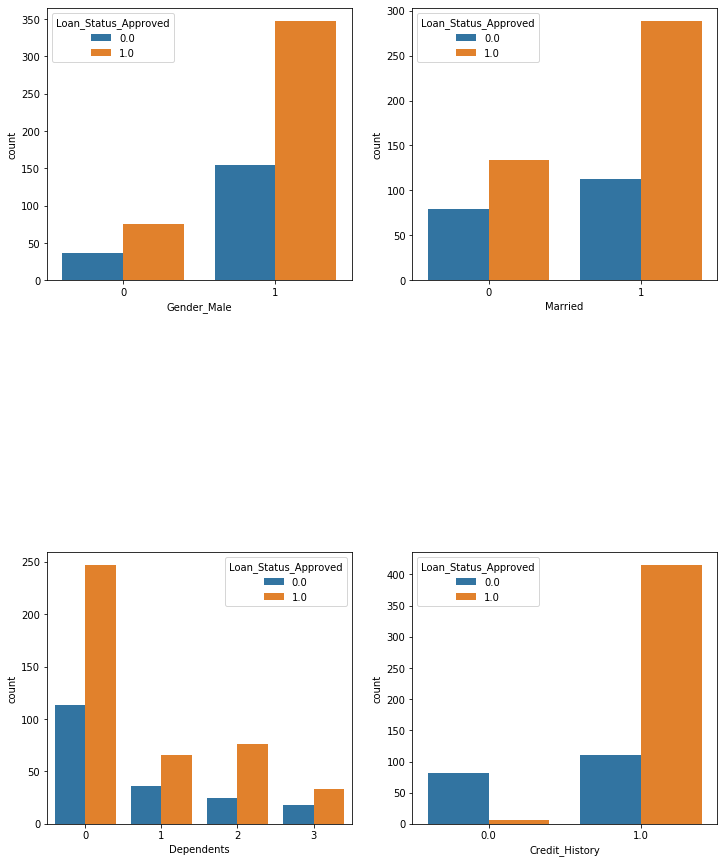

In [28]:
# Select a few columns to visualize Loan approval
selected_columns = ['Gender_Male', 'Married', 'Dependents', 'Credit_History']

figure, axes = plt.subplots(2, 2, figsize=(12,15))

for i, j in enumerate(selected_columns):
    row, col = i//2, i%2
    sns.countplot(x=j, data= train_df, hue='Loan_Status_Approved', ax=axes[row,col])

plt.subplots_adjust(hspace=1)
plt.show()

In [29]:
# Our Machine learning classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [30]:
# select targets for training and testing datasets
X = train_df.drop(columns='Loan_Status_Approved')
y = train_df['Loan_Status_Approved']

In [31]:
new_test_df = test_df.drop(columns='Target')

In [32]:
# Select targets for training and testing datasets
X_train,X_test,y_train,y_test = train_test_split(X,y , test_size=0.3, stratify =y, random_state =42)

#Create Random Forest
rf_clf = RandomForestClassifier(n_estimators=100, max_depth=3, min_samples_leaf = 10)
rf_clf.fit(X_train,y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=3, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [33]:
# predict training set
y_pred = rf_clf.predict(X_train)

In [34]:
from sklearn.metrics import accuracy_score, f1_score
print("Train F1 Score ", f1_score(y_train, y_pred)*100)
print("Train Accuracy ", accuracy_score(y_train, y_pred)*100)

Train F1 Score  86.6965620328849
Train Accuracy  79.25407925407926


In [35]:
y_pred = rf_clf.predict(new_test_df)
print(y_pred)

[1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 0. 1. 0. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1.
 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0.
 1. 1. 1. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1.
 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1.
 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 0. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1.
 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1.